## Plotting with Histogram

In [1]:
import pandas as pd
import pymc3 as pm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
df1 = pd.read_csv('../data/2014.12.17 OneEigth in Si post', header=None , names = ['Time', 'Temp'],  delimiter = '\t')
df2 = pd.read_csv('../data/2014.12.17 OneFourth in Si post', header=None , names = ['Time', 'Temp'],  delimiter = '\t')
df3 = pd.read_csv('../data/2014.12.17 OneHalf in Si post', header=None , names = ['Time', 'Temp'],  delimiter = '\t')
df4 = pd.read_csv('../data/2014.12.17 ThreeFourths in Si post', header=None , names = ['Time', 'Temp'],  delimiter = '\t')
df5 = pd.read_csv('../data/2014.12.17 One in Si post', header=None , names = ['Time', 'Temp'],  delimiter = '\t')

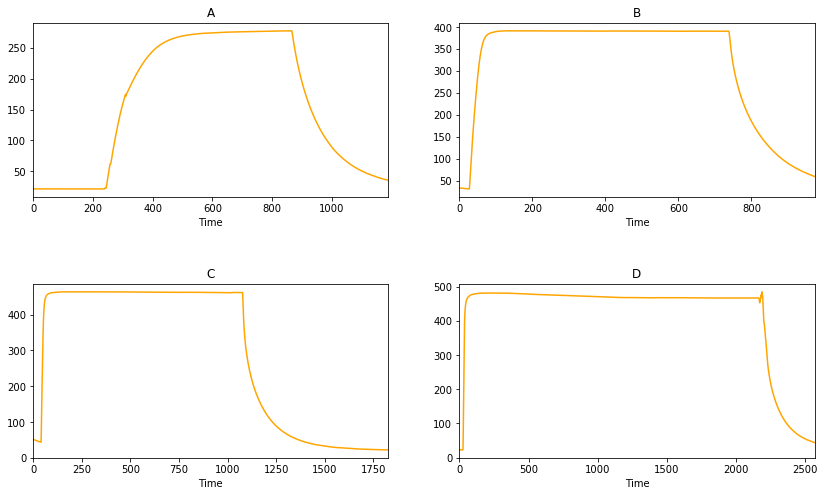

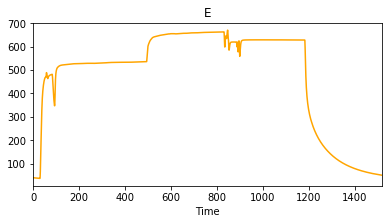

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
fig.subplots_adjust(hspace=.5)
df1.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[0,0]); axes[0,0].set_title('A')
df2.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[0,1]); axes[0,1].set_title('B')
df3.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[1,0]); axes[1,0].set_title('C')
df4.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[1,1]); axes[1,1].set_title('D');
df5.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, title = 'E', figsize=(6.25, 3));


In [67]:
#isolating the thermal decay curve with a time condition from above and removing noisy measurements near room temperature. 
df1 = df1[ (df1.Time > 600) & (df1.Temp > 50) & (df1.Temp < 250)]
df2 = df2[ (df2.Time > 600) & (df2.Temp > 50) & (df2.Temp < 350)]
df3 = df3[ (df3.Time > 1000) & (df3.Temp > 50) & (df3.Temp < 400)]
df4 = df4[ (df4.Time > 2250) & (df4.Temp > 50) & (df4.Temp < 500)]
df5 = df5[ (df5.Time > 1050) & (df5.Temp > 50) & (df5.Temp < 500)]



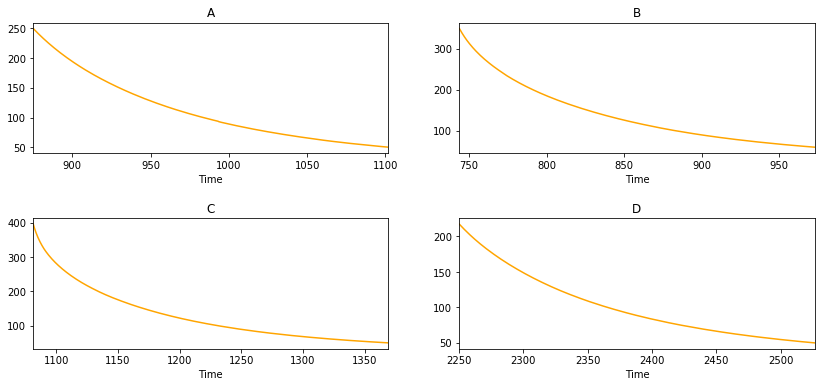

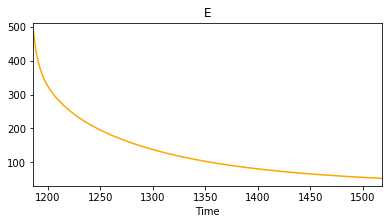

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
fig.subplots_adjust(hspace=.5)
df1.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[0,0]); axes[0,0].set_title('A')
df2.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[0,1]); axes[0,1].set_title('B')
df3.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[1,0]); axes[1,0].set_title('C')
df4.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[1,1]); axes[1,1].set_title('D');
df5.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, title = 'E', figsize=(6.25, 3));


In [17]:
#Establish constants and solve for emmisivity 

def em_column(df):
    #Constants: sigma [J/(m^2*s*K^4)]; m, mass in kilograms; T0 in K; A, area in m^2
    a = 0.0002
    T0 = 23 + 273.15
    sigma = 5.670373e-08  
    m = 0.0000693  
    
      #Converts Celcius to Kelvin
    df['TempK'] = df['Temp'] + 273.15 
    
    #heat capacity for silicon as a function of temperature. Constants from Endo, 2003. 
    c = lambda x: 836.7306973 + 1.09e-01*x - 1.04e-05*x**2
    
    #Gives 'em'  column correct length
    df[ 'em' ] = np.nan
    
    #Reset the index for easy iteration 
    df.reset_index(inplace = True, drop = True)
    
    #iterate through columns and solve for emissivity 
    for i in range(2, len(df)):
        numerator = -m*c(df.TempK[ i ])*( df.TempK[ i ] - df.TempK[ i - 2 ] )
        denominator =  ( df.Time[ i ] - df.Time[ i - 2] )*a*sigma*(df.TempK[ i -2]**4 - T0**4  )
        df['em'][i] =  numerator / denominator
        
    #Make temperature ascending 
    df.sort_values(['Temp'], ascending=True, inplace =True)
    #Reset the index for easy data cleaning 
    df.reset_index(inplace = True, drop = True)

In [81]:
#Establish constants and solve for emmisivity. COPY FROM ABOVE

def em_column(df):
    #Constants: sigma [J/(m^2*s*K^4)]; m, mass in kilograms; T0 in K; A, area in m^2
    a = 0.0002
    T0 = 23 + 273.15
    sigma = 5.670373e-08  
    m = 0.0000693  
    lam1 = .011
    
      #Converts Celcius to Kelvin
    df['TempK'] = df['Temp'] + 273.15 
    
    #heat capacity for silicon as a function of temperature. Constants from Endo, 2003. 
    c = lambda x: 836.7306973 + 1.09e-01*x - 1.04e-05*x**2
    
    #Gives 'em'  column correct length
    df[ 'em2' ] = m*lam1*(df.TempK - T0)*(836.7306973+1.09e-01*(2*df.TempK-T0)+1.04e-05*df.TempK*(2*T0-3*df.TempK))/(a*sigma*(df.TempK**4 - T0**4))
    
    #(836.7306973+1.09e-01*(2*df.TempK-T0)+1.04e-05*dfTemp.K*(2*T0-3*df.TempK))/(a*sigma*(df.TempK**4 - T0**4))
        
    #Make temperature ascending 
    df.sort_values(['Temp'], ascending=True, inplace =True)
    #Reset the index for easy data cleaning 
    df.reset_index(inplace = True, drop = True)
    


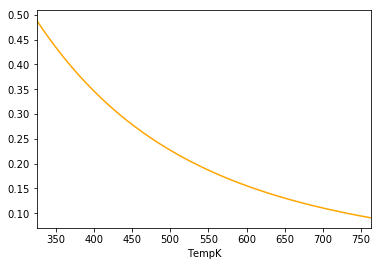

In [82]:
em_column(df5)
df5.plot(x = 'TempK', y = 'em2', color = 'orange', legend = False)


In [43]:
#Solve emissivity for all data sets 
em_column(df1)
em_column(df2)
em_column(df3)
em_column(df4)
em_column(df5)

In [44]:
#Clean up three outliers in first data set 
df1.em[200:203] = np.nan

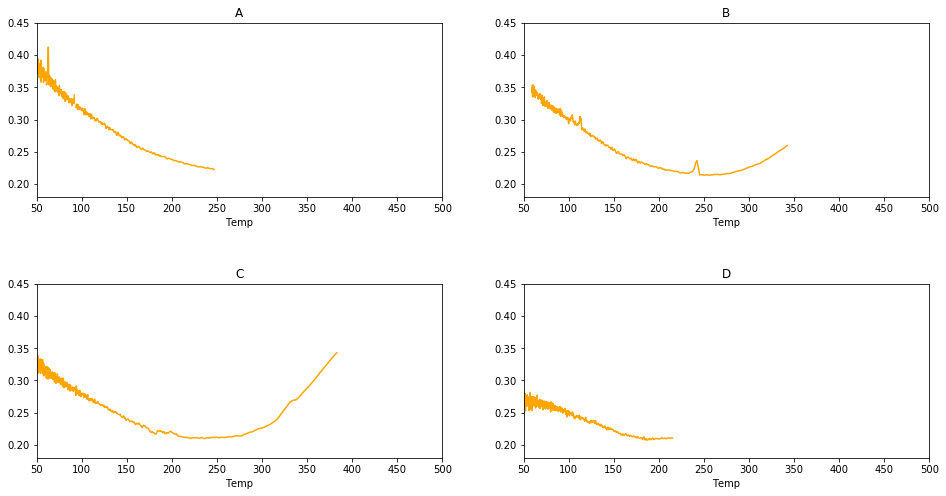

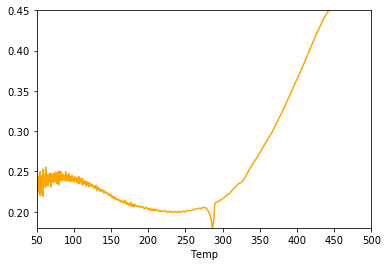

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
fig.subplots_adjust(hspace=.5)
df1.plot(y = 'em', x = 'Temp', color = 'orange', ylim = (0.18,.45), xlim = (50,500), legend = False, ax=axes[0,0]); axes[0,0].set_title('A')
df2.plot(y = 'em', x = 'Temp', color = 'orange', ylim = (0.18,.45),  xlim = (50,500), legend = False, ax=axes[0,1]); axes[0,1].set_title('B')
df3.plot(y = 'em', x = 'Temp', color = 'orange', ylim = (0.18,.45),  xlim = (50,500), legend = False, ax=axes[1,0]); axes[1,0].set_title('C')
df4.plot(y = 'em', x = 'Temp', color = 'orange', ylim = (0.18,.45),  xlim = (50,500), legend = False, ax=axes[1,1]); axes[1,1].set_title('D');
df5.plot(y = 'em', x = 'Temp', color = 'orange', ylim = (0.18,.45),  xlim = (50,500), legend = False)


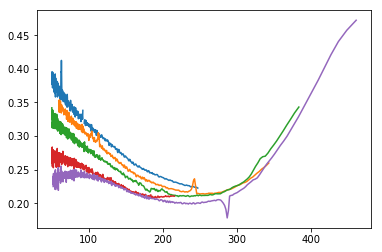

In [49]:
#Plot all emissivities 
plt.plot(df1.Temp , df1.em,  df2.Temp, df2.em, df3.Temp, df3.em, df4.Temp, df4.em , df5.Temp, df5.em )
plt.show()

In [ ]:
#Need to calculate theoretical curve to determine what emissivity would be at 600C. Then Calculate the overall efficiency at that temperature. 